# Linear Regression Implementation 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
class LinearRegression():
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs 
    
    def predict(self, X):
        return np.dot(X, self.W) + self.w0 
    
    def update_weights(self):
        Y_pred = self.predict(self.X)
        
        # Calculate the gradients 
        # for w1, w2, .... wd
        dW = -2 * np.dot(self.X.T, (self.Y - Y_pred))/self.X.shape[0]
        
        # for w0 
        dw0 = -2 * np.sum(self.Y - Y_pred)/self.X.shape[0]
        
        # Update the weights 
        self.W = self.W - self.learning_rate * dW 
        self.w0 = self.w0 - self.learning_rate * dw0 
        
        return self.W, self.w0 
    
    def fit(self, X, Y):
        
        self.X = X 
        self.Y = Y 
        self.error_list = [] 

        # no_of traning_examples, no_of_features 
        self.m, self.d = self.X.shape
    
        # weight initialization 
        self.W = np.zeros(self.d) * 0.01
        self.w0 = 0 
        
        # Gradient Decent Learning 
        for i in range(self.epochs):
            self.update_weights()
            Y_pred = self.predict(self.X)
            
            error = np.square(Y - Y_pred).mean()
            self.error_list.append(error) 
        
        return self
        
        
        

In [5]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [6]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [8]:
lr = LinearRegression(learning_rate=0.01, epochs=2000)

In [9]:
lr.fit(X_train, y_train)

In [10]:
lr.predict(X_test)

array([-0.9746799 , -0.38277866,  2.81085001, ...,  0.34497536,
       -0.6229236 , -0.05737614])

In [11]:
lr.W

array([ 0.06295232, -0.03153492, -0.04921152,  0.02865564,  0.02838895,
       -0.06295232,  0.05788839,  0.79274703, -0.01544432, -0.00333054,
        0.01570708,  0.01267802,  0.002691  , -0.02594316, -0.01490515,
       -0.01188608, -0.01984954])

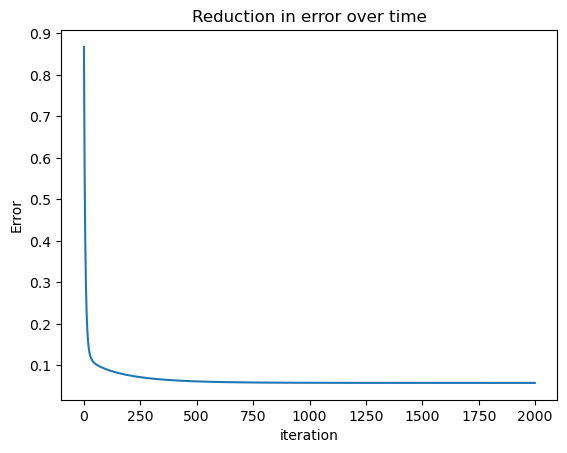

In [12]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()